# EDA 

In [15]:
#### Import libraries

import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns 

%matplotlib inline
pd.set_option('display.max_columns',None)

In [16]:
## import dataset
Data = pd.read_csv('/Users/inazawaelectronics/Desktop/Data-Analyst-Intern-Project/FIFA WORLD CUP ANALYSIS PROJECT/Data/cleaned_worldcupmatches.csv')
Data.head()

,Year,Datetime,Stage,Stadium,City,Home Team Name,Home Team Goals,Away Team Goals,Away Team Name,Win conditions,Attendance,Half-time Home Goals,Half-time Away Goals,Referee,Assistant 1,Assistant 2,RoundID,MatchID,Home Team Initials,Away Team Initials
0,1930.0,1930-07-13 15:00:00,Group 1,Pocitos,Montevideo,France,4.0,1.0,Mexico,,4444.0,3.0,0.0,LOMBARDI Domingo (URU),CRISTOPHE Henry (BEL),REGO Gilberto (BRA),201.0,1096.0,FRA,MEX
1,1930.0,1930-07-13 15:00:00,Group 4,Parque Central,Montevideo,USA,3.0,0.0,Belgium,,18346.0,2.0,0.0,MACIAS Jose (ARG),MATEUCCI Francisco (URU),WARNKEN Alberto (CHI),201.0,1090.0,USA,BEL
2,1930.0,1930-07-14 12:45:00,Group 2,Parque Central,Montevideo,Yugoslavia,2.0,1.0,Brazil,,24059.0,2.0,0.0,TEJADA Anibal (URU),VALLARINO Ricardo (URU),BALWAY Thomas (FRA),201.0,1093.0,YUG,BRA
3,1930.0,1930-07-14 14:50:00,Group 3,Pocitos,Montevideo,Romania,3.0,1.0,Peru,,2549.0,1.0,0.0,WARNKEN Alberto (CHI),LANGENUS Jean (BEL),MATEUCCI Francisco (URU),201.0,1098.0,ROU,PER
4,1930.0,1930-07-15 16:00:00,Group 1,Parque Central,Montevideo,Argentina,1.0,0.0,France,,23409.0,0.0,0.0,REGO Gilberto (BRA),SAUCEDO Ulises (BOL),RADULESCU Constantin (ROU),201.0,1085.0,ARG,FRA


### Average Goles Per Match

In [17]:
### Adding two features for find total goals per match
Total_gols_per_match = Data['Away Team Goals'] + Data['Home Team Goals']

Avg_gl_pr_mch = Total_gols_per_match.mean()

result = int(Avg_gl_pr_mch)

print(f'Average Goals Per Match is {result}')

Average Goals Per Match is 2


## home and away win rates

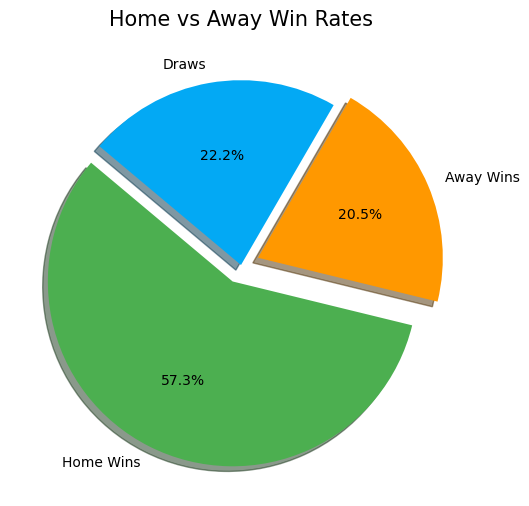

In [18]:
df = Data[['Home Team Goals','Away Team Goals']]


# Calculate the number of home wins, away wins, and draws
home_wins = (df['Home Team Goals'] > df['Away Team Goals']).sum()
away_wins = (df['Away Team Goals'] > df['Home Team Goals']).sum()
draws = (df['Home Team Goals'] == df['Away Team Goals']).sum()
total_matches = len(df)

# Data for pie chart
labels = ['Home Wins', 'Away Wins', 'Draws']
sizes = [home_wins, away_wins, draws]
colors = ['#4CAF50', '#FF9800', '#03A9F4']  # Custom colors
explode = (0.1, 0.1, 0)  # Explode the Home and Away Wins

# Plotting the pie chart
plt.figure(figsize=(6, 6))
plt.pie(sizes, explode=explode, labels=labels, colors=colors, 
        autopct='%1.1f%%', shadow=True, startangle=140)
plt.title('Home vs Away Win Rates', fontsize = 15)
plt.show()

### observation:

1. Home team win rate is more then heigher away win rates (57.3)
2. Draw rates and Away win rates are mostly equal 

## Attendance Trends

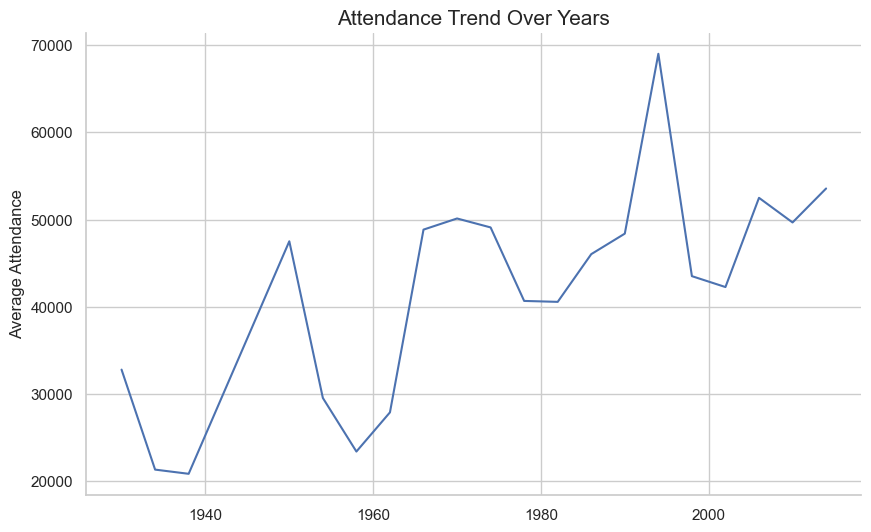

In [45]:
# Group by year to find average attendance
yearly_attendance = Data.groupby('Year')['Attendance'].mean().reset_index()


# Set plot style without gridlines
sns.set(style="whitegrid", rc={'axes.grid': False})


# Plotting the attendance trend using Seaborn
plt.figure(figsize=(10, 6))
sns.lineplot(data=yearly_attendance, x='Year', y='Attendance', color='b', markers='O')
sns.despine()
sns.set_theme(style= 'ticks')

# Adding labels and title

plt.xlabel('')
plt.ylabel('Average Attendance')
plt.title('Attendance Trend Over Years', fontsize = 15)
plt.grid(True)

# Show the plot
plt.show()

## popular stadiums.

/var/folders/8h/34w8609j6936zp6y_871bvk00000gn/T/ipykernel_6367/2843946325.py:28: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=popular_stadiums.head(10), x='Attendance', y='Stadium', palette= 'dark:b')
/Users/inazawaelectronics/anaconda3/lib/python3.11/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 65533 (\N{REPLACEMENT CHARACTER}) missing from font(s) Arial.
  fig.canvas.print_figure(bytes_io, **kw)


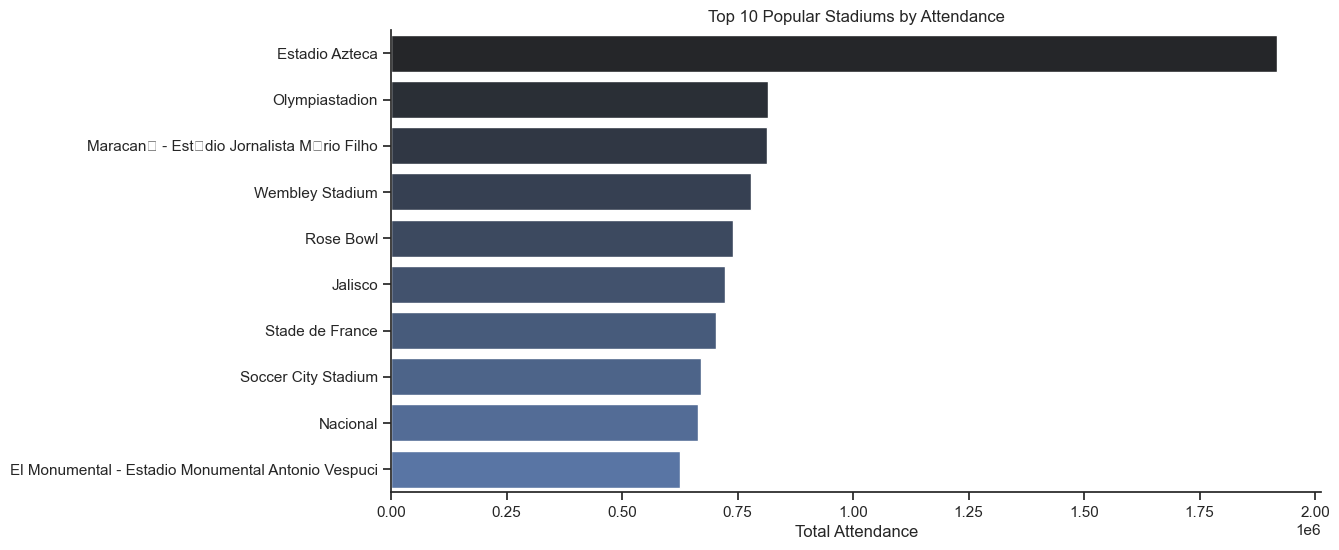

In [63]:
# Group by stadium name and sum the attendance
stadium_attendance = Data.groupby('Stadium')['Attendance'].sum().reset_index()

# Sort by attendance in descending order
popular_stadiums = stadium_attendance.sort_values(by='Attendance', ascending=False)

# Display the top stadiums
popular_stadiums.head(10)

# Count matches played at each stadium
stadium_match_count = Data.groupby('Stadium')['Datetime'].count().reset_index()
stadium_match_count.rename(columns={'Datetime': 'match_count'}, inplace=True)

# Merge with attendance data
popular_stadiums = popular_stadiums.merge(stadium_match_count, on='Stadium')

# Sort by attendance
popular_stadiums = popular_stadiums.sort_values(by='Attendance', ascending=False)

popular_stadiums.head(10)

# Set the size of the plot
plt.figure(figsize=(12, 6))


# Create a bar plot for the top stadiums
sns.set_theme(style='ticks')
sns.barplot(data=popular_stadiums.head(10), x='Attendance', y='Stadium', palette= 'dark:b')
sns.despine()
plt.title('Top 10 Popular Stadiums by Attendance')
plt.xlabel('Total Attendance')
plt.ylabel('')
plt.show()

In [65]:
popular_stadiums.head(10)

,Stadium,Attendance,match_count
0,Estadio Azteca,1917550.0,19
1,Olympiastadion,815300.0,14
2,Maracan� - Est�dio Jornalista M�rio Filho,813541.0,8
3,Wembley Stadium,778034.0,9
4,Rose Bowl,740807.0,8
5,Jalisco,722456.0,14
6,Stade de France,704000.0,9
7,Soccer City Stadium,670859.0,8
8,Nacional,663771.0,10
9,El Monumental - Estadio Monumental Antonio Ves...,625389.0,9
